<a href="https://colab.research.google.com/github/Looma1116/Kaggle-Study_Seungjoon_Lee/blob/main/week8_PCA_vs_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# wine data
import pandas as pd
dat_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

from sklearn.model_selection import train_test_split
x,y=dat_wine.iloc[:,1:].values, dat_wine.iloc[:,0].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=1,stratify=y)

from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_train_std=std.fit_transform(x_train)
x_test_std=std.transform(x_test)


In [7]:
dat_wine.columns #14차원!

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')

In [9]:
#eigen value, vector
import numpy as np
scov = np.cov(x_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(scov)
print('Eigenvalues \n%s' %eigen_vals)

Eigenvalues 
[4.7095539  2.63606471 1.55728758 0.93422662 0.85129454 0.5709688
 0.46462025 0.37764772 0.10409155 0.14951983 0.21165109 0.2630501
 0.27571434]


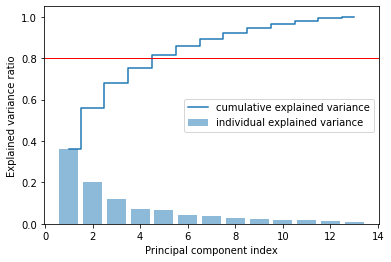

In [16]:
#Explained variance ratio
tot = sum(eigen_vals)
var_exp=[( i / tot) for i in sorted(eigen_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt
plt.bar(range(1,14), var_exp, alpha = 0.5, align='center', label='individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid', label='cumulative explained variance')
plt.axhline(y=0.8, color='r', linewidth=1)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [21]:
#PCA로 축소 후 로지스틱 회귀
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
lpca = PCA(n_components=4)
x_train_pca = lpca.fit_transform(x_train_std)
x_test_pca = lpca.transform(x_test_std)

lr=LogisticRegression()
lr.fit(x_train_pca, y_train)
y_train_pred = lr.predict(x_train_pca)
y_test_pred = lr.predict(x_test_pca)

from sklearn import metrics
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))



0.9758064516129032
0.9629629629629629


In [23]:
#LDA로 축소 후 로지스틱 회귀
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2) #차원을 2로
x_train_lda = lda.fit_transform(x_train_std, y_train)
x_test_lda = lda.transform(x_test_std)

lr = LogisticRegression()
lr.fit(x_train_lda, y_train)
y_train_pred = lr.predict(x_train_lda)
y_test_pred = lr.predict(x_test_lda)

from sklearn import metrics
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

1.0
0.9629629629629629
